**Preparing Data**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from google.colab import files

In [3]:
# Uploading the dataset
uploaded = files.upload()


Saving diabetes (1).csv to diabetes (1).csv


In [4]:
#Loading the dataset
dataset_path = list(uploaded.keys())[0]
data = pd.read_csv(dataset_path)

**Pre-Processing dataset**

In [5]:
#replacing missing values with column mean for numerical features
for column in data.select_dtypes(include=[np.number]).columns:
    data[column] = data[column].fillna(data[column].mean())

In [6]:
#missing values for categorical values
for column in data.select_dtypes(include=[object]).columns:
    data[column] = data[column].fillna(data[column].mode()[0])

In [7]:
#outliers using IQR
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [8]:
#categorical variables to numerical using one-hot encoding
categorical_columns = data.select_dtypes(include=[object]).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
data = pd.concat([data.drop(categorical_columns, axis=1), categorical_data], axis=1)

In [9]:
#Normalization numerical features
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=[np.number]).columns
scaled_data = scaler.fit_transform(data[numerical_columns])
data[numerical_columns] = scaled_data



In [10]:
#features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#target variable is categorical
y = y.astype(int)

In [11]:
#class imbalance - Stratification
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)


In [12]:
# Split the data into training and testing sets, training: 80%, testing: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Model Training**






In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# Predict on test set
y_pred = model.predict(X_test)

**Evaluation**


Model Accuracy: 76.00%

Confusion Matrix:
[[76 24]
 [24 76]]


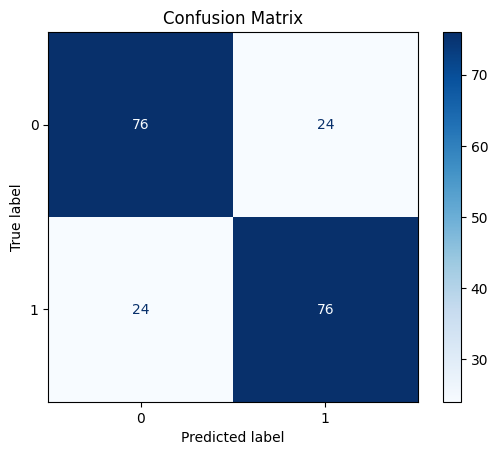


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       100
           1       0.76      0.76      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [17]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"\nModel Accuracy: {accuracy:.2f}%")

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualization of confusion matrix
# Changed 'logistic_model' to 'model' to access the correct variable
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))